In [39]:
import matplotlib.pyplot as plt
import math

## 1 Introdução ao modelo de Perceptron

O modelo de algoritmo Perceptron é um modelo de rede neural utilizado para classificação binária, indicando se um elemento pertence ou não a uma determinada classe. Trata-se de um modelo de aprendizado supervisionado.

O Perceptron pode receber n parâmetros de entrada, onde cada entrada possui um peso associado. Esses pesos são ajustados durante o treinamento com base em uma função de erro, de modo a minimizar a diferença entre a saída prevista e a saída esperada.

A representação gráfica de um algoritmo Perceptron, pode ser vista na figura abaixo:
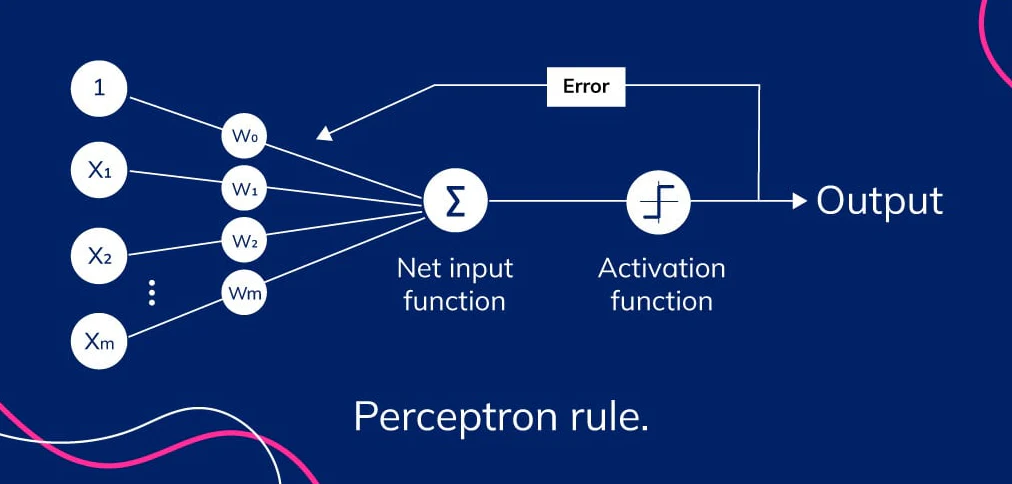

Um Perceptron de n entrada pode ter sua fronteira de decisão definida por:


$u = x_1 w_1 + x_2 w_2 + \cdots + x_n w_n + b$

Onde na equação:
* $u$ é o valor intermediário antes da ativação.
* $wi$ são os pesos.
* $xi$ são as entradas.
* $b$ é o bias (viés).



Como $xi$ é a entrada, e $wi$ seus pesos, logo o seu produto será $xiwi$. A soma ponderada será $Σxiwi$. $u$ também pode ser expresso por $X⋅W+b$, onde $X⋅W$ é o produto escalar dos vetores da entrada e peso.


A implementação, antes da função de ativação, pode ser descrita abaixo:

In [40]:
##Peceptron com u antes da função de ativação
#entradas binárias
x = [1, -1]
w = [0.8, 0.5]
b = -0.3

#criação da função de cálculo do produto escalar
def dot(vet1, vet2):
    if len(vet1) == len(vet2):
      resultado = 0
      for i in range(len(vet1)):
          resultado += vet1[i] * vet2[i]
      return resultado


#Aplicação da equação
u = dot(x, w) + b

u

5.551115123125783e-17

O valor de u é então passado como entrada para a função de ativação ϕ($u$). A função de ativação  seráuma função onde vai transformar $u$,  que é uma combinação linear, em uma saída binária.
A função de ativação a ser utilizada será uma função degrau, mostrada abaixo

ϕ($u$) =\begin{cases}
1 & \text{se } u \geq 0 \\
0 & \text{se } u < 0
\end{cases}

Implementando a função de ativação, tem-se:

In [41]:
def ativacao_degrau(u):
  if u >= 0:
      return 1
  else:
      return 0

#set dos parâmetros
x = [1, -1]
w = [0.8, 0.5]
b = -0.3

#Aplicação da equação
u = dot(x, w) + b

#aplicando a função de ativação
ativacao_degrau(u)

1

Esta função é utilizada no Percepetron para transformar o U em uma saída, e, por ser uma função degrau, ela vai  atuar como um limiar de decisão, sendo sua saída 0 ou 1, explicitando seu pertencimento a valores de classe ou booleanos.

Para calcular o erro (função de custo), pode ser expresso matematicamente:

$E = ydesejado − ypredito$

Onde ydesejado é o valor esperado, e ypredito é o valor calculado pelo perceptron.
A função de custo pode ser interpretadada em:
\begin{cases}
E = 0 & \text{sem erros, sem necessidade de ajuste de peso} \\
E \neq 0 & \text{com erros, necessário o ajuste de peso }
\end{cases}

Uma implementação simples da função de custo pode ser visto a seguir.

In [42]:
def calcular_erro(ydesejado, ypredito):
  return ydesejado - ypredito

#Parâmetros
ydesejado = 1
ypredito = 0

#Aplicação da função
calcular_erro(ydesejado, ypredito)

1

Para atualização dos pesos e bias, será necessário utilizar uma equação para cada parâmetro.

Para atualização dos pesos:

$wi = wi + n ⋅ e ⋅ xi$

Para atualização do bias:

$b = b + n ⋅ e$

Onde:

*   $wi$ é o peso atual
*   $xi$ é o entrada reacionada
*   $n$ é a taxa de aprendizado
*   $e$ é o erro calculado



Para implementação de atualização para cada parâmetro, tem-se:

In [43]:
def update(peso, bias, entrada, erro, taxa_aprendizado):
  novos_pesos = []
  for i in range(len(peso)):
    novo_w = peso[i] + taxa_aprendizado * erro * entrada[i]
    novos_pesos.append(novo_w)

  novo_bias = bias + taxa_aprendizado * erro

  return novos_pesos, novo_bias

In [44]:
#Parâmetros
x = [1, -1]
w = [0.8, 0.5]
b = -0.3
erro = 1
n = 0.1

w_update, b_update = update(w, b, x, erro, n)

print(w_update)
print(b_update)


[0.9, 0.4]
-0.19999999999999998


# 2. Perceptron aos problemas lógicos AND e OR


Para a demonstração do Perceptron, foram abordados os problemas lógicos AND e OR. Mas para isso, primeiramente, foi criada a função de treino do Perceptron.

In [45]:
def train(entradas, saidas_desejadas, n=0.1, epocas=10):
  n_features = len(entradas[0])
  w = [0.0] * n_features
  b = 0.0

  historico_erro = []
  historico_pesos = []
  historico_bias = []

  for epoca in range(epocas):
    print(f"Época {epoca+1}")
    erro_total = 0
    for i in range(len(entradas)):
      x = entradas[i]
      y = saidas_desejadas[i]
      u = dot(x, w) + b
      y_pred = ativacao_degrau(u)
      erro = calcular_erro(y, y_pred)
      erro_total += abs(erro)

      w, b = update(w, b, x, erro, n)

      print(f"  Entrada: {x} | Erro: {erro}")
      print(f"  Pesos: {w} | Bias: {b}")
    historico_erro.append(erro_total)
    historico_pesos.append(w[:])
    historico_bias.append(b)
    print()

  return w, b, historico_erro, historico_pesos, historico_bias

In [46]:
def plot(historico_erro, historico_pesos, historico_bias):
  epocas = range(1, len(historico_erro) + 1)

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epocas, historico_erro, marker='o')
  plt.title('Erro Total por Época')
  plt.xlabel('Época')
  plt.ylabel('Erro')
  plt.grid(True)
  plt.subplot(1, 2, 2)
  for i in range(len(historico_pesos[0])):
    pesos_i = [pesos[i] for pesos in historico_pesos]
    plt.plot(epocas, pesos_i, label=f'w{i + 1}')
  plt.plot(epocas, historico_bias, '--', label='bias')
  plt.title('Pesos e Bias por Época')
  plt.xlabel('Época')
  plt.ylabel('Valor')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

Para a função lógica AND, implementando o treinamento, usando como padrão 10 épocas:

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -0.1
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.0, 0.0] | Bias: -0.1
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 0.0] | Bias: -0.1
  Entrada: [1, 1] | Erro: 1
  Pesos: [0.1, 0.1] | Bias: 0.0

Época 2
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [0, 1] | Erro: -1
  Pesos: [0.1, 0.0] | Bias: -0.2
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.1, 0.0] | Bias: -0.2
  Entrada: [1, 1] | Erro: 1
  Pesos: [0.2, 0.1] | Bias: -0.1

Época 3
  Entrada: [0, 0] | Erro: 0
  Pesos: [0.2, 0.1] | Bias: -0.1
  Entrada: [0, 1] | Erro: -1
  Pesos: [0.2, 0.0] | Bias: -0.2
  Entrada: [1, 0] | Erro: -1
  Pesos: [0.1, 0.0] | Bias: -0.30000000000000004
  Entrada: [1, 1] | Erro: 1
  Pesos: [0.2, 0.1] | Bias: -0.20000000000000004

Época 4
  Entrada: [0, 0] | Erro: 0
  Pesos: [0.2, 0.1] | Bias: -0.20000000000000004
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.2, 0.1] | Bias: -0.20000000000000004
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.2, 

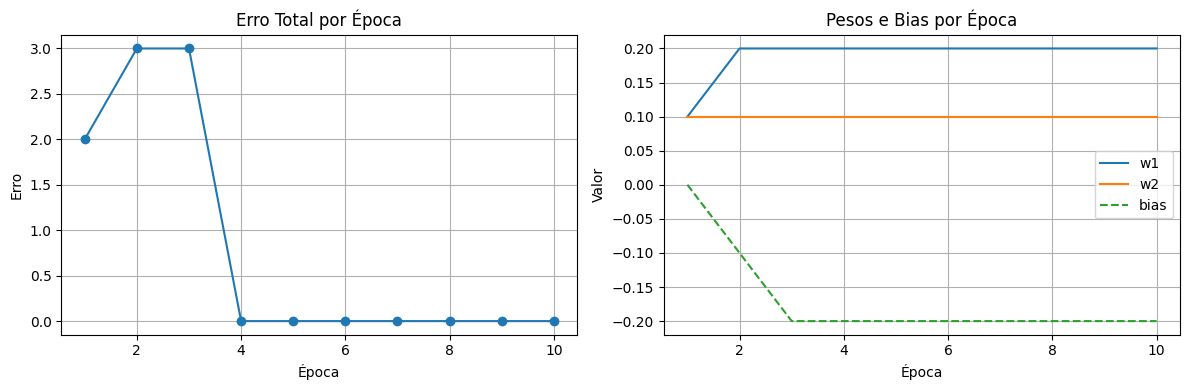

In [47]:
##AND
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 0, 0, 1]

w, b, erros, pesos, bias = train(entradas, saidas, 0.1, 10)
plot(erros, pesos, bias)

Fazendo o mesmo exemplo, só que com a taxa de aprendizagem maior ($n = 0.5$ e $n = 1$):

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [1, 1] | Erro: 1
  Pesos: [0.5, 0.5] | Bias: 0.0

Época 2
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: -1
  Pesos: [0.5, 0.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.5, 0.0] | Bias: -1.0
  Entrada: [1, 1] | Erro: 1
  Pesos: [1.0, 0.5] | Bias: -0.5

Época 3
  Entrada: [0, 0] | Erro: 0
  Pesos: [1.0, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: -1
  Pesos: [1.0, 0.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: -1
  Pesos: [0.5, 0.0] | Bias: -1.5
  Entrada: [1, 1] | Erro: 1
  Pesos: [1.0, 0.5] | Bias: -1.0

Época 4
  Entrada: [0, 0] | Erro: 0
  Pesos: [1.0, 0.5] | Bias: -1.0
  Entrada: [0, 1] | Erro: 0
  Pesos: [1.0, 0.5] | Bias: -1.0
  Entrada: [1, 0] | Erro: -1
  Pesos: [0.5, 0.5] | Bias: -1.5
  Entrada: [1, 1] | Erro: 1
  Pesos: [1.0, 1.

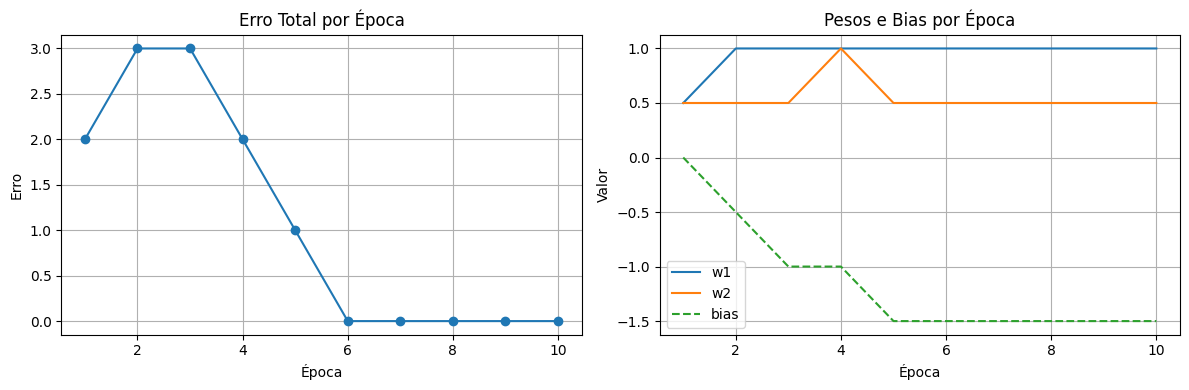

In [48]:
##AND com n = 0.5
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 0, 0, 1]

w, b, erros, pesos, bias = train(entradas, saidas, 0.5, 10)
plot(erros, pesos, bias)

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [1, 1] | Erro: 1
  Pesos: [0.5, 0.5] | Bias: 0.0

Época 2
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: -1
  Pesos: [0.5, 0.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.5, 0.0] | Bias: -1.0
  Entrada: [1, 1] | Erro: 1
  Pesos: [1.0, 0.5] | Bias: -0.5

Época 3
  Entrada: [0, 0] | Erro: 0
  Pesos: [1.0, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: -1
  Pesos: [1.0, 0.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: -1
  Pesos: [0.5, 0.0] | Bias: -1.5
  Entrada: [1, 1] | Erro: 1
  Pesos: [1.0, 0.5] | Bias: -1.0

Época 4
  Entrada: [0, 0] | Erro: 0
  Pesos: [1.0, 0.5] | Bias: -1.0
  Entrada: [0, 1] | Erro: 0
  Pesos: [1.0, 0.5] | Bias: -1.0
  Entrada: [1, 0] | Erro: -1
  Pesos: [0.5, 0.5] | Bias: -1.5
  Entrada: [1, 1] | Erro: 1
  Pesos: [1.0, 1.

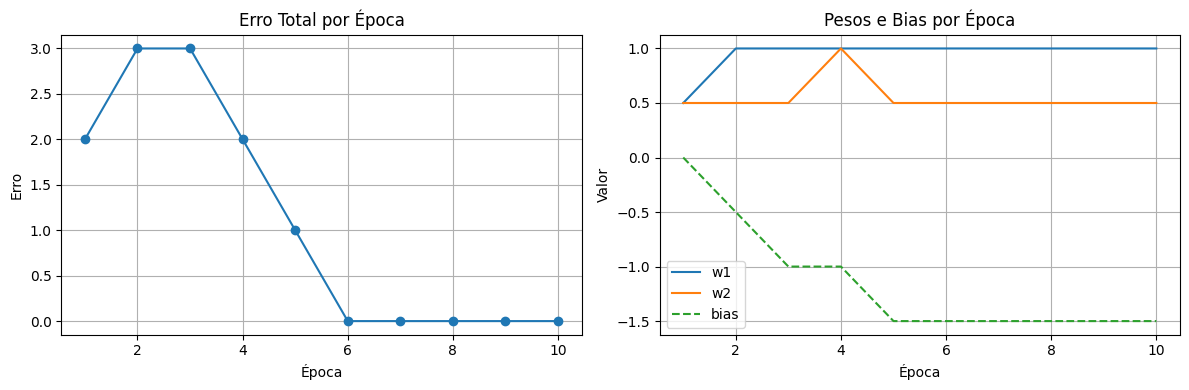

In [49]:
##AND com n = 1
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 0, 0, 1]

w, b, erros, pesos, bias = train(entradas, saidas, 0.5, 10)
plot(erros, pesos, bias)

Ao treinar o Perceptron com o dataset da função lógica AND, observou-se que com taxa de aprendizagem $n=0.1$, o erro total foi zerado já na quarta época. Para taxas mais altas, como $n=0.5$ e $n=1.0$, o erro foi zerado apenas na sexta época. Além disso, verificou-se que os valores dos pesos e do bias também variaram entre as diferentes taxas. Apesar das diferenças no tempo de convergência, os comportamentos para $n=0.5$ e $n=1.0$ foram bastante semelhantes em termos de atualização e estabilização dos parâmetros.

Já  para o dataset OR, pode-se realizar o mesmo procedimento da AND, mudando os parâmetros de entrada e saída, como mostra a implementação abaixo, alternando o n entre 0.1, 0.5 e 1.

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -0.1
  Entrada: [0, 1] | Erro: 1
  Pesos: [0.0, 0.1] | Bias: 0.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 0.1] | Bias: 0.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.0, 0.1] | Bias: 0.0

Época 2
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.1] | Bias: -0.1
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.0, 0.1] | Bias: -0.1
  Entrada: [1, 0] | Erro: 1
  Pesos: [0.1, 0.1] | Bias: 0.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: 0.0

Época 3
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: -0.1

Época 4
  Entrada: [0, 0] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.1, 0.1] | Bias: -0.1
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.1, 0.1] | Bi

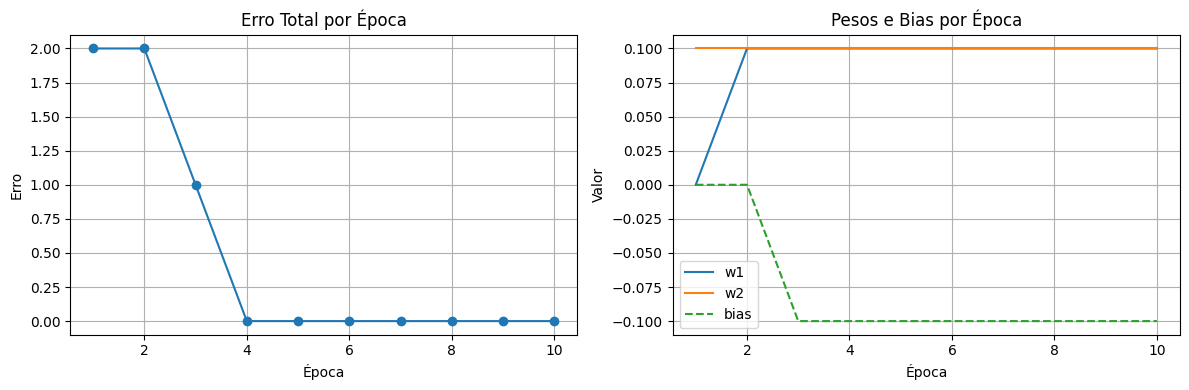

In [50]:
##OR com n = 0.1
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 1, 1, 1]

w, b, erros, pesos, bias = train(entradas, saidas, 0.1, 10)
plot(erros, pesos, bias)

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -0.5
  Entrada: [0, 1] | Erro: 1
  Pesos: [0.0, 0.5] | Bias: 0.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 0.5] | Bias: 0.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.0, 0.5] | Bias: 0.0

Época 2
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.0, 0.5] | Bias: -0.5
  Entrada: [1, 0] | Erro: 1
  Pesos: [0.5, 0.5] | Bias: 0.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: 0.0

Época 3
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: -0.5

Época 4
  Entrada: [0, 0] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.5, 0.5] | Bias: -0.5
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.5, 0.5] | Bi

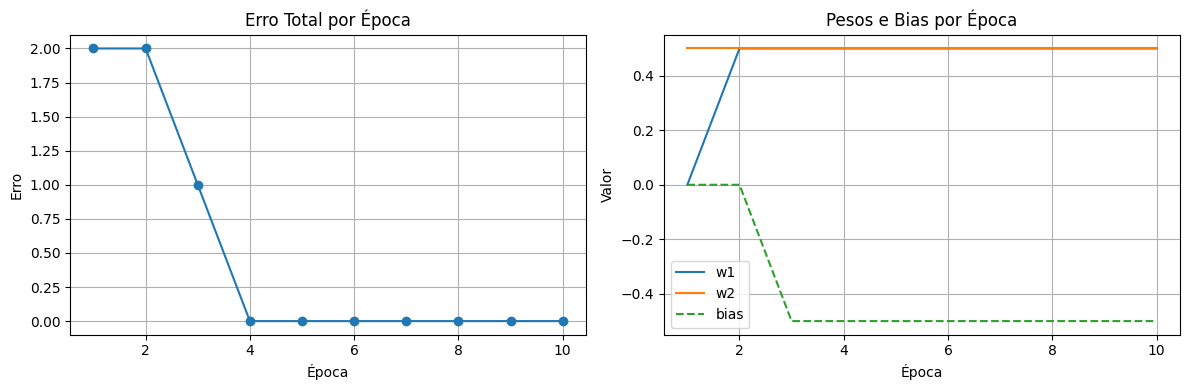

In [51]:
##OR com n = 0.5
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 1, 1, 1]

w, b, erros, pesos, bias = train(entradas, saidas, 0.5, 10)
plot(erros, pesos, bias)

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -1.0
  Entrada: [0, 1] | Erro: 1
  Pesos: [0.0, 1.0] | Bias: 0.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 1.0] | Bias: 0.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [0.0, 1.0] | Bias: 0.0

Época 2
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 1.0] | Bias: -1.0
  Entrada: [0, 1] | Erro: 0
  Pesos: [0.0, 1.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: 1
  Pesos: [1.0, 1.0] | Bias: 0.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: 0.0

Época 3
  Entrada: [0, 0] | Erro: -1
  Pesos: [1.0, 1.0] | Bias: -1.0
  Entrada: [0, 1] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: -1.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: -1.0

Época 4
  Entrada: [0, 0] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: -1.0
  Entrada: [0, 1] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: -1.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [1.0, 1.0] | Bias: -1.0
  Entrada: [1, 1] | Erro: 0
  Pesos: [1.0, 1.0] | Bi

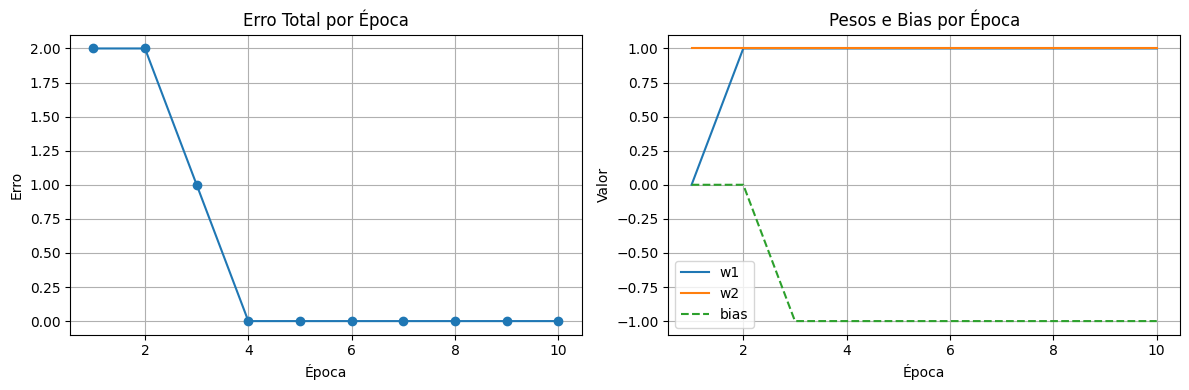

In [52]:
##OR com n = 1
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 1, 1, 1]

w, b, erros, pesos, bias = train(entradas, saidas, 1, 10)
plot(erros, pesos, bias)

Já para o treino realizado com o dataset OR, os parrâmetros de peso,  bias e erro se permaneceram os mesmos, com detalhe que na quarta época já não havia mais erros sinalizados.

# 3. Discussão do problema XOR e suas implicações para a evolução das redes neurais

Para iniciar a discussão, vamos implementar o treinamento no conjunto de dados XOR para observar seu comportamento.

Época 1
  Entrada: [0, 0] | Erro: -1
  Pesos: [0.0, 0.0] | Bias: -0.1
  Entrada: [0, 1] | Erro: 1
  Pesos: [0.0, 0.1] | Bias: 0.0
  Entrada: [1, 0] | Erro: 0
  Pesos: [0.0, 0.1] | Bias: 0.0
  Entrada: [1, 1] | Erro: -1
  Pesos: [-0.1, 0.0] | Bias: -0.1

Época 2
  Entrada: [0, 0] | Erro: 0
  Pesos: [-0.1, 0.0] | Bias: -0.1
  Entrada: [0, 1] | Erro: 1
  Pesos: [-0.1, 0.1] | Bias: 0.0
  Entrada: [1, 0] | Erro: 1
  Pesos: [0.0, 0.1] | Bias: 0.1
  Entrada: [1, 1] | Erro: -1
  Pesos: [-0.1, 0.0] | Bias: 0.0

Época 3
  Entrada: [0, 0] | Erro: -1
  Pesos: [-0.1, 0.0] | Bias: -0.1
  Entrada: [0, 1] | Erro: 1
  Pesos: [-0.1, 0.1] | Bias: 0.0
  Entrada: [1, 0] | Erro: 1
  Pesos: [0.0, 0.1] | Bias: 0.1
  Entrada: [1, 1] | Erro: -1
  Pesos: [-0.1, 0.0] | Bias: 0.0

Época 4
  Entrada: [0, 0] | Erro: -1
  Pesos: [-0.1, 0.0] | Bias: -0.1
  Entrada: [0, 1] | Erro: 1
  Pesos: [-0.1, 0.1] | Bias: 0.0
  Entrada: [1, 0] | Erro: 1
  Pesos: [0.0, 0.1] | Bias: 0.1
  Entrada: [1, 1] | Erro: -1
  Pesos: [-0.1, 

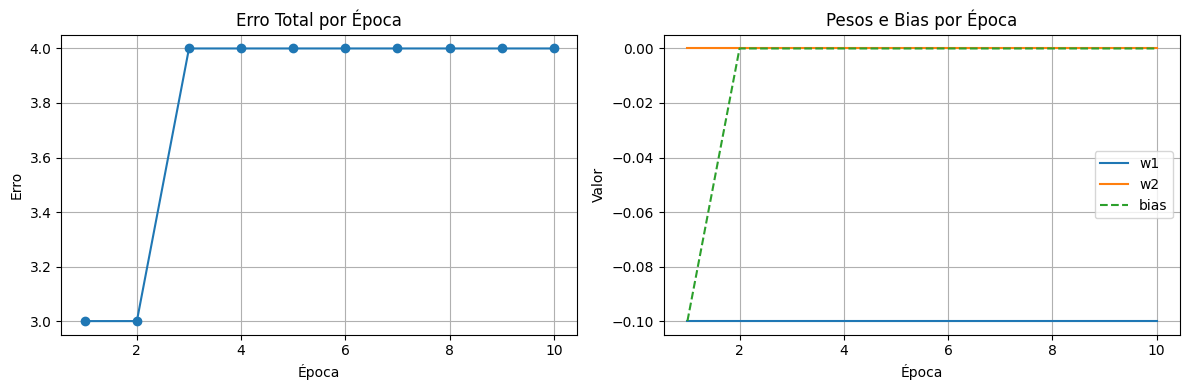

In [53]:
##XOR com n = 0.1
entradas = [[0, 0], [0, 1], [1, 0], [1, 1]]
saidas = [0, 1, 1, 0]

w, b, erros, pesos, bias = train(entradas, saidas, 0.1, 10)
plot(erros, pesos, bias)

Observa-se que quando treina o Perceptron com o XOR, a tendência é que o erro aumente ou se permaneça presente à medida que a quantidade de épocas for aumentando.  O valor do bias, que antes era negativo, agora passa a ser 0.
O Perceptron é um modelo linear, e ele consegue resolver problemas apenas onde os mesmos possam ser separados por uma linha reta, ou um plano, o que o impede de apredenr com base de dados como a do XOR.

Neste contexto surge a MLP (Multilayer Perceptron), que possui camadas intermediárias entre a camada de entrada e de saída, permitindo seu uso como um modelo não linear. O XOR não é linearmente separável, logo pode ser resolvida com uma camada escondida com dois neurônios e um neurônio na saída, como mostra o modelo abaixo.

Entrada (x1, x2) → [Camada oculta com 2 neurônios] → [Saída]


# Bônus

Implementação de 10 funções de ativação

In [54]:
def degrau(u):
  return 1 if u >= 0 else 0

def degrau_bipolar(u):
  return 1 if u >= 0 else -1

def linear(u):
  return u

def linear_limitado(u):
  return max(0, min(1, u))

def linear_bipolar(u):
  return max(-1, min(1, u))

def sigmoid(u):
  return 1 / (1 + math.exp(-u))

def tanh(u):
  return math.tanh(u)

def relu(u):
  return max(0, u)

def leaky_relu(u, alpha=0.01):
  return u if u >= 0 else alpha * u

def elu(u, alpha=1.0):
  return u if u >= 0 else alpha * (math.exp(u) - 1)


In [55]:
x = [1, -1]
w = [0.8, 0.5]
b = -0.3

u = dot(x, w) + b
print("degrau: ", degrau(u))
print("degrau bipolar: ", degrau_bipolar(u))
print("linear: ", linear(u))
print("linear limitado: ", linear_limitado(u))
print("linear bipolar ", linear_bipolar(u))
print("sigmoid: ", sigmoid(u))
print("tanh: ", tanh(u))
print("relu: ", relu(u))
print("leaky relu: ", leaky_relu(u))
print("elu: ", elu(u))

degrau:  1
degrau bipolar:  1
linear:  5.551115123125783e-17
linear limitado:  5.551115123125783e-17
linear bipolar  5.551115123125783e-17
sigmoid:  0.5
tanh:  5.551115123125783e-17
relu:  5.551115123125783e-17
leaky relu:  5.551115123125783e-17
elu:  5.551115123125783e-17
